### data loading

In [2]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
import torchvision.transforms as transforms

In [4]:
my_transforms = transforms.ToTensor()

train_dataset = torchvision.datasets.FashionMNIST(root="data", download=False, train=True, transform=my_transforms)
test_dataset = torchvision.datasets.FashionMNIST(root="data", download=False, train=False, transform=my_transforms)

In [6]:
batch_size = 32

train_dataloader = data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=32, num_workers=4)
test_dataloader = data.DataLoader(dataset=test_dataset, shuffle=False, batch_size=32, num_workers=4)

In [22]:
def get_fashion_mnist_labels(labels):
    label_encoded = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
    label_texts = []
    for label in labels:
        label_texts.append(label_encoded[label])
    
    return label_texts

torch.Size([1, 28, 28])
['bag']


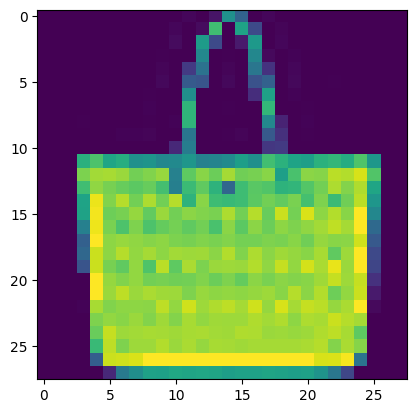

In [23]:

import matplotlib.pyplot as plt

for X,y in train_dataloader:
    print(X[0].shape)
    plt.imshow(X[0].permute(1,2,0))
    print(get_fashion_mnist_labels([y[0]]))
    break

In [135]:
def show_images (imgs,num_cols, num_rows, title=None, scale=0.5):
    figsize = (num_cols* scale, num_rows * scale)
    plt.subplots_adjust(hspace=0.8, wspace=0.2)
    for i in range(len(imgs)):
#         plt.figure(figsize=figsize)
        plt.subplot(num_cols, num_rows, i+1)
        plt.imshow(imgs[i].permute(1,2,0))
#         plt.text(0.5, -0.02,title[i],fontsize=9 )
        plt.title(title[i], fontsize=9)
        plt.axis('off')
        plt.grid(b=None)

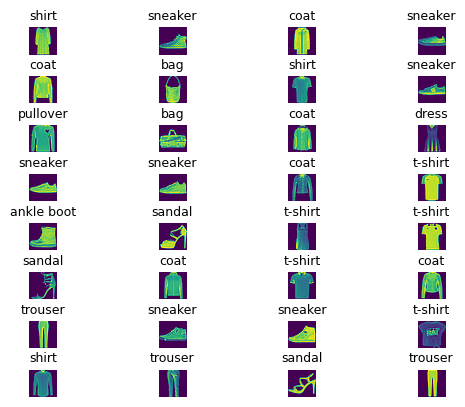

In [136]:
for X, y in train_dataloader:
    labels = get_fashion_mnist_labels(y)
    show_images(X,8,4, title=labels)
    break

### initialising model parameters

In [196]:
# each figure is 28 by 28 since we would be flattening it so the input size becomes 28 * 28
# the number of output would be in this case 10
# since we would have onlu one so w would be 784 * 10 and bias would be 1 * 10

W = torch.normal(0,1,size=(784,10), requires_grad=True)
# b = torch.normal(0,1,size=(1,10), requires_grad=True)


In [210]:
b = torch.zeros(10, requires_grad=True)

In [211]:
# defining softmax

def softmax(X):
    numerator = torch.exp(X)
    denominator = numerator.sum(1, keepdims=True)
    return numerator/denominator

In [212]:
X = torch.normal(0,1,size=(3,2))
print("Before softmax: ")
print(X)
print(X.sum(dim=1)) # the sum not equal to 1
print("\nAfter softmax: ")
print(softmax(X))
print(softmax(X).sum(dim=1)) # verified softmax is working as it should be

Before softmax: 
tensor([[ 0.5481,  0.3500],
        [ 0.0076,  0.2272],
        [-0.2648, -0.4228]])
tensor([ 0.8982,  0.2348, -0.6876])

After softmax: 
tensor([[0.5494, 0.4506],
        [0.4453, 0.5547],
        [0.5394, 0.4606]])
tensor([1., 1., 1.])


In [213]:
def softmax_regression_model(X):
    return softmax(torch.matmul(X.reshape(-1,W.shape[0]), W) + b)

In [214]:
# without training prediction
for X, y in train_dataloader:
    with torch.no_grad():
        result = softmax_regression_model(X[0])
        print(result.argmax(1))
    break

tensor([1])


In [215]:
# cross entropy is negative log of probabilities(taken from y_hat) of actual label (taken from y)
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])
    

In [216]:
# looking at loss

for X, y in train_dataloader:
    with torch.no_grad():
        result = softmax_regression_model(X)
        print(f"Output from softmax regression model for entire batch (y_hat) :\n\n{result}\n")
        loss = cross_entropy(result, y)
        print(f"The loss :\n\n{loss}\n")
        print(f"Argmax of result :\n\n{result.argmax(1)}\n")
        
    break

Output from softmax regression model for entire batch (y_hat) :

tensor([[1.2441e-06, 1.5050e-05, 1.9518e-15, 9.6156e-13, 3.9826e-20, 1.3124e-17,
         1.5509e-12, 2.9353e-13, 5.9305e-17, 9.9998e-01],
        [7.7281e-06, 9.9998e-01, 1.7780e-07, 6.1745e-07, 2.1172e-10, 1.4528e-11,
         1.0618e-05, 1.5789e-10, 1.2969e-06, 2.4478e-08],
        [1.4666e-13, 1.0000e+00, 5.5407e-13, 3.4222e-13, 3.4305e-09, 8.8963e-14,
         8.2426e-13, 2.0614e-16, 1.5628e-09, 2.0468e-10],
        [3.7503e-07, 1.0000e+00, 1.7465e-09, 1.0717e-13, 1.2963e-15, 4.6875e-16,
         1.8209e-11, 3.3110e-11, 1.5252e-14, 1.1589e-08],
        [8.7032e-06, 9.9188e-01, 8.3658e-04, 1.6550e-04, 3.3794e-03, 4.0472e-05,
         9.3574e-05, 2.6453e-09, 3.5925e-03, 7.7256e-06],
        [7.7023e-13, 1.0000e+00, 6.2816e-15, 3.0809e-13, 3.4901e-10, 3.4947e-14,
         1.6575e-10, 6.1645e-19, 1.3826e-11, 4.1550e-14],
        [5.9434e-10, 1.0000e+00, 3.3636e-12, 1.2682e-08, 1.0262e-26, 1.6938e-19,
         8.2654e-13,

In [217]:
def accuracy(y_hat, y):
#     print(y_hat.argmax(1))
    return (y_hat.argmax(1)==y).sum()

In [218]:
# looking at accuracy

for X,y in train_dataloader:
    with torch.no_grad():
        predictions = softmax_regression_model(X)
        acc = accuracy(predictions, y)
        print("Accuracy: \n", acc/ len(y) )
        break

Accuracy: 
 tensor(0.0625)


In [219]:
# for the entire dataset evaluation of accuracy

def evaluate_accuracy(net, data_iter):
    tot_acc=0
    tot_number=0
    with torch.no_grad():
        for X, y in data_iter:
            predictions = net(X)
            tot_acc += int(accuracy(predictions, y))
            tot_number += len(y)
    return tot_acc/tot_number
            
        

In [206]:
evaluate_accuracy(softmax_regression_model, train_dataloader)

0.02615

In [220]:
def sgd(params=[W,b], lr=0.1, batch_size=batch_size):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr /batch_size
            param.grad.zero_()
        

In [221]:
W, b, W.shape, b.shape, W.grad, b.grad # initial Weight values

(tensor([[ 0.6018, -0.2508, -1.1506,  ...,  0.7414,  1.0085,  0.0231],
         [ 0.7711,  0.4035, -0.2040,  ..., -0.2000,  0.2666,  0.0121],
         [-0.4910, -0.2883,  0.0265,  ..., -2.2533, -0.4752,  1.2995],
         ...,
         [ 0.7657, -0.8479, -0.8463,  ..., -1.7806, -1.1704, -2.4884],
         [ 0.1856,  0.4126, -0.4981,  ...,  1.9616, -0.2109,  1.1860],
         [ 0.8166,  1.4268, -0.3653,  ..., -0.3204,  0.5024,  0.5199]],
        requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True),
 torch.Size([784, 10]),
 torch.Size([10]),
 None,
 None)

In [222]:
updater = sgd

In [223]:
def train_epoch_ch3(net, train_iter, loss, updater):
    training_loss = 0
    training_len = 0
    trainin_acc = 0
    for X,y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        l.sum().backward()
        updater()
        training_len += len(y)
        training_loss += l.sum()
        training_acc += accuracy(y_hat, y)
    
    avg_loss = training_loss/training_len
    avg_acc = training_acc/training_len
    print(f"> average training acc: {avg_acc}")
    print(f"> average training loss: {avg_loss}")
    return avg_loss, avg_acc
        

In [ ]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    for epoch in num_epochs:
        train_metrics = train_epoch_ch3(ne)
    